In [1]:
# Here we use Kaggle API to download PlantVillage dataset by uploading API token
# You can find it by logging into your Kaggle account and going to account settings, API section and click on "Create New API Token"
! pip install kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d arjuntejaswi/plant-village

# Decompress Dataset file
!unzip plant-village.zip

# Install split_folders to use it in splitting dataset into training, validation and testing files
!pip install split_folders

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/092330d8-f6e9-48df-8525-cb391b8f00b7___YLCV_GCREC 2930.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09266523-41f5-42cd-bf15-5f13a6cec876___UF.GRC_YLCV_Lab 02419.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09320877-b96e-46ea-b1d3-6f915d60180f___UF.GRC_YLCV_Lab 02550.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09397385-9a50-4d0a-bc52-bccfd6aa7c59___UF.GRC_YLCV_Lab 01763.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLea

In [2]:
# To Delete Pepper bell datasets
!rm -r /content/PlantVillage/Pepper__bell___Bacterial_spot /content/PlantVillage/Pepper__bell___healthy

# To Delete Tomato datasets
!rm -r /content/PlantVillage/Tomato_healthy /content/PlantVillage/Tomato__Tomato_mosaic_virus /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus /content/PlantVillage/Tomato__Target_Spot /content/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite 
!rm -r /content/PlantVillage/Tomato_Septoria_leaf_spot /content/PlantVillage/Tomato_Leaf_Mold /content/PlantVillage/Tomato_Late_blight /content/PlantVillage/Tomato_Early_blight /content/PlantVillage/Tomato_Bacterial_spot

In [3]:
# Here we split the PlantVillage dataset into a new folder called dataset 
# which includes 3 folders: train, val, test with ratios 70%, 10% and 20% respectively.
!split_folders --output dataset --ratio .7 .1 .2 -- PlantVillage

Copying files: 2152 files [00:00, 5844.03 files/s]


In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Model
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from keras.layers import Conv2D, MaxPool2D , MaxPooling2D

In [5]:
imgSize = 256
RGBClasses = 3

trainingDataGenerator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip=True
)
train_generator = trainingDataGenerator.flow_from_directory(
        '/content/dataset/train',
        target_size=(imgSize,imgSize),
        batch_size=32,
        class_mode="sparse",
)

Found 1506 images belonging to 3 classes.


In [6]:
train_generator.class_indices
classNames = list(train_generator.class_indices.keys())
classNames

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
for images,labels in train_generator:
    print(images.shape)
    break

(32, 256, 256, 3)


In [8]:
validationDataGenerator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip=True
)
validation_generator = validationDataGenerator.flow_from_directory(
        '/content/dataset/val',
        target_size=(imgSize,imgSize),
        batch_size=32,
        class_mode="sparse",
)

Found 215 images belonging to 3 classes.


In [9]:
testingDataGenerator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip=True
)
test_generator = testingDataGenerator.flow_from_directory(
        '/content/dataset/test',
        target_size=(imgSize,imgSize),
        batch_size=32,
        class_mode="sparse",
)

Found 431 images belonging to 3 classes.


In [10]:
inputShape = (imgSize, imgSize, RGBClasses)
n_classes = 3

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=inputShape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.build(inputShape)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=399,
    validation_data=validation_generator,
    validation_steps=7,
    verbose=1,
    epochs=50,
)

Epoch 1/50
47/47 [==============================] - 35s 509ms/step - loss: 0.9465 - accuracy: 0.4593 - val_loss: 0.8828 - val_accuracy: 0.4791
Epoch 2/50
47/47 [==============================] - 23s 496ms/step - loss: 0.8112 - accuracy: 0.5923 - val_loss: 0.9633 - val_accuracy: 0.4651
Epoch 3/50
47/47 [==============================] - 23s 494ms/step - loss: 0.7195 - accuracy: 0.6377 - val_loss: 0.6116 - val_accuracy: 0.7070
Epoch 4/50
47/47 [==============================] - 23s 495ms/step - loss: 0.5521 - accuracy: 0.7422 - val_loss: 0.4831 - val_accuracy: 0.7860
Epoch 5/50
47/47 [==============================] - 23s 497ms/step - loss: 0.3219 - accuracy: 0.8697 - val_loss: 0.3005 - val_accuracy: 0.8744
Epoch 6/50
47/47 [==============================] - 23s 494ms/step - loss: 0.2803 - accuracy: 0.8908 - val_loss: 0.2081 - val_accuracy: 0.9116
Epoch 7/50
47/47 [==============================] - 23s 492ms/step - loss: 0.2395 - accuracy: 0.9077 - val_loss: 0.3235 - val_accuracy: 0.8465

In [15]:
evaluation = model.evaluate(test_generator)

14/14 [==============================] - 7s 423ms/step - loss: 0.0682 - accuracy: 0.9861


Text(0.5, 0, 'epoch')

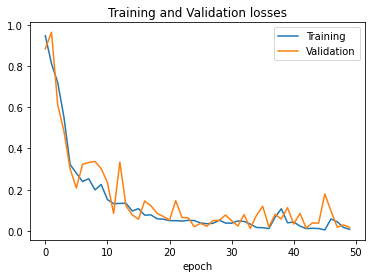

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

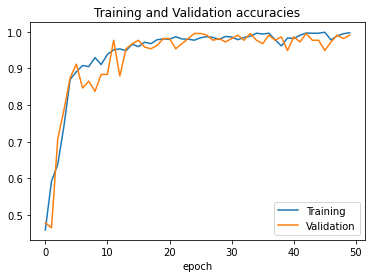

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracies')
plt.xlabel('epoch')

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


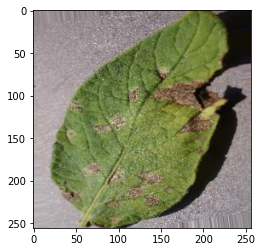

In [18]:
for images, labels in test_generator:
    
    first_image = images[0]
    first_label = int(labels[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classNames[first_label])
    
    batch_prediction = model.predict(images)
    print("predicted label:",classNames[np.argmax(batch_prediction[0])])
    break

In [19]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classNames[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

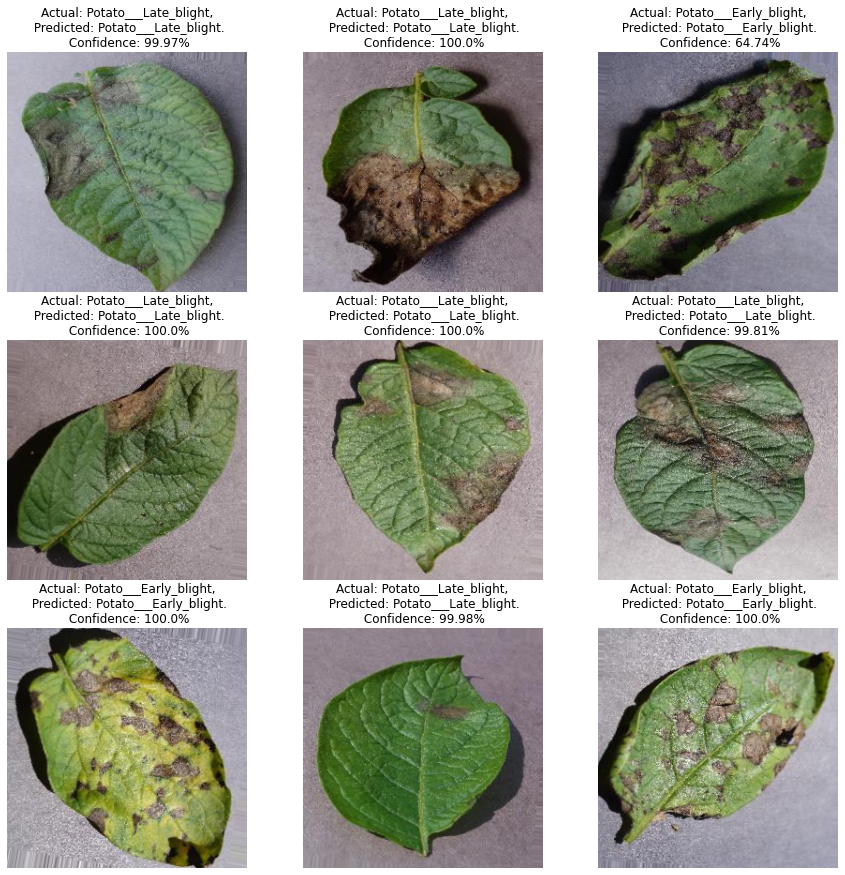

In [20]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = classNames[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [22]:
model.save("/content/potatoesss.h5")